<a href="https://colab.research.google.com/github/RahulKoppula/Network.Anomaly.Detection/blob/main/Network_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install all necessary Python packages for Snowflake connectivity, machine learning, and data visualization.

In [1]:
!pip install snowflake-connector-python scikit-learn matplotlib seaborn


Connect to Snowflake, activate the correct warehouse, and load the processed feature table into a pandas DataFrame.

In [2]:
import snowflake.connector
import pandas as pd

# Define your connection info
conn = snowflake.connector.connect(
    user='RahulK',
    password='Blackbird@SR71',
    account='qbnyjjm-fo49998',
    warehouse='COMPUTE_WH',
    database='Network Traffic Anomaly Detection Dataset',
    schema='DATA'
)
# Explicitly activate your warehouse
conn.cursor().execute("USE WAREHOUSE COMPUTE_WH;")
# Query the processed data
query = '''
SELECT *
FROM "Network Traffic Anomaly Detection Dataset".DATA.PROCESSED_TABLE
'''

# Load query result into a pandas DataFrame
df = pd.read_sql(query, conn)

# Check the DataFrame
print(df.shape)
df.head()


/tmp/ipython-input-2-549590623.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


(1000, 18)


,PACKET_SIZE,INTER_ARRIVAL_TIME,SRC_PORT,DST_PORT,PACKET_COUNT_5S,MEAN_PACKET_SIZE,SPECTRAL_ENTROPY,FREQUENCY_BAND_ENERGY,LABEL,PROTOCOL_TYPE_TCP,PROTOCOL_TYPE_UDP,src_ip_192.168.1.2,src_ip_192.168.1.3,dst_ip_192.168.1.5,dst_ip_192.168.1.6,TCP_FLAGS_FIN,TCP_FLAGS_SYN,tcp_flags_syn-ack
0,0.405154,0.620362,62569,443,0.857143,0,0.834066,0.5348906847626227,0.0,False,True,True,False,False,False,False,False,False
1,0.527559,0.741288,59382,443,0.785714,0,0.147196,0.9907566019833739,0.0,False,True,False,False,False,True,False,True,False
2,0.226199,0.485116,65484,80,0.285714,0,0.855192,0.03178112930236281,0.0,False,True,False,False,True,False,False,False,False
3,0.573372,0.450965,51707,53,0.142857,0,0.153220,0.16995800838242914,0.0,False,False,False,True,False,False,False,False,False
4,0.651396,0.888740,26915,53,0.714286,0,0.923916,0.5520532009424409,0.0,True,False,False,True,False,False,False,True,False


Preprocess the dataset, split into train/test, train four ML models, and collect individual performance results with confusion matrix and ROC visualization.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


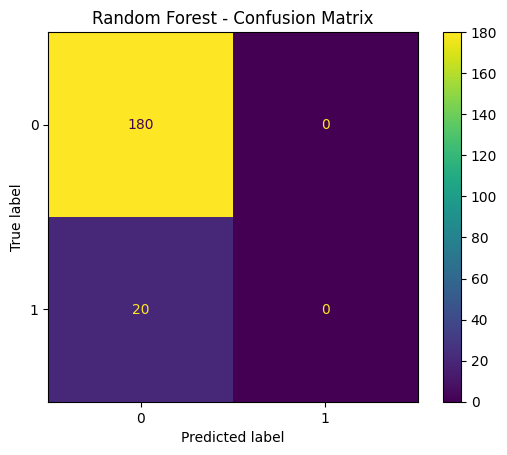

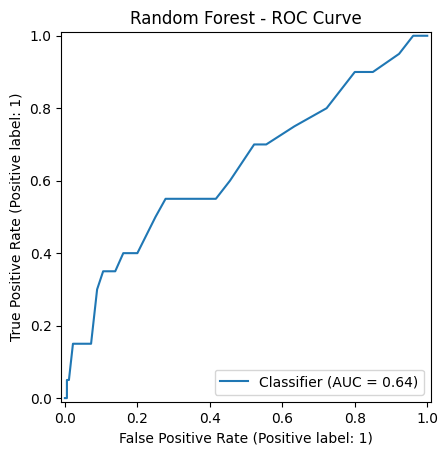

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


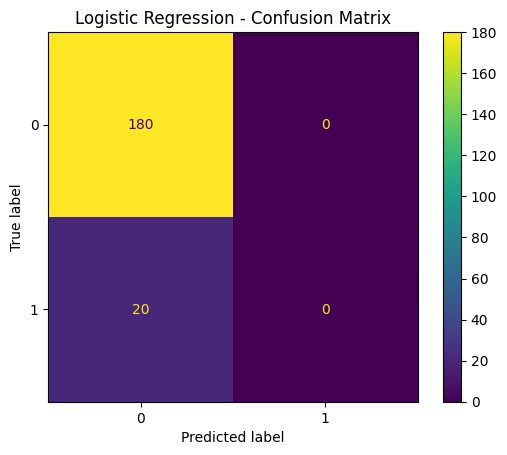

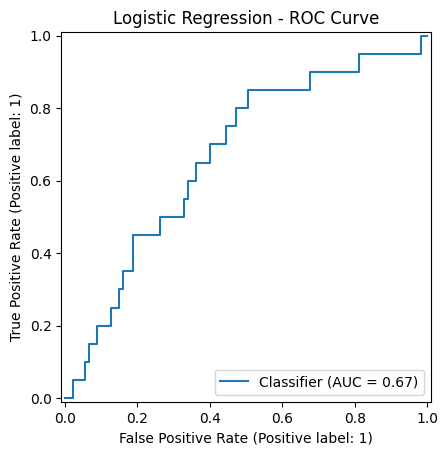

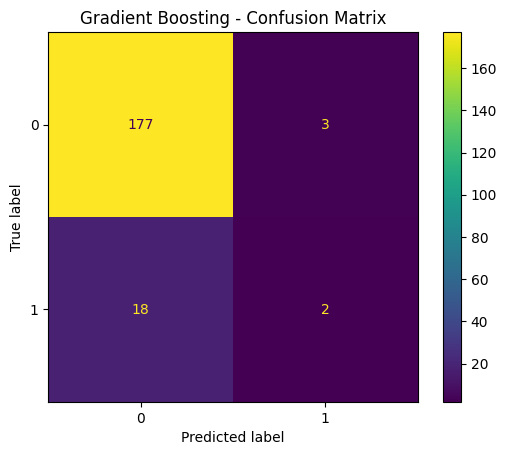

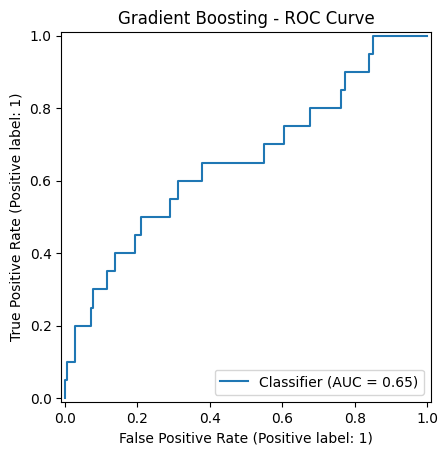

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


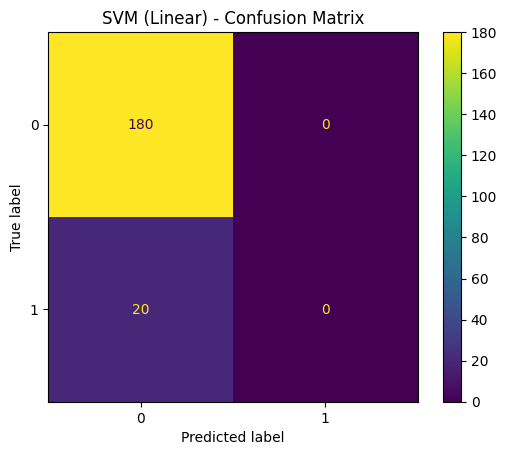

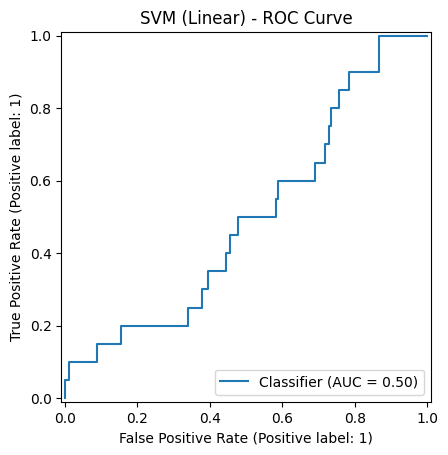

                 Model  Accuracy  Precision  Recall  F1       AUC
0        Random Forest     0.900          0       0   0  0.636111
1  Logistic Regression     0.900          0       0   0  0.668333
2    Gradient Boosting     0.895          0       0   0  0.654722
3         SVM (Linear)     0.900          0       0   0  0.497222


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df is your loaded DataFrame from Snowflake
X = df.drop(columns=['LABEL'])
y = df['LABEL']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM (Linear)": SVC(kernel='linear', probability=True, random_state=42)
}
roc_auc_dict = {}
results_list = []
for name, clf in models.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    y_proba = clf.predict_proba(X_test_scaled)[:,1] if hasattr(clf, "predict_proba") else None
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    results_list.append({
    "Model": name,
    "Accuracy": report.get('accuracy', 0),
    "Precision": report.get('1', {}).get('precision', 0),
    "Recall": report.get('1', {}).get('recall', 0),
    "F1": report.get('1', {}).get('f1-score', 0),
    "AUC": auc
})
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'{name} - Confusion Matrix')
    plt.show()
    # ROC Curve (if available)
    if y_proba is not None:
        roc_auc_dict[name] = (y_test, y_proba)
        RocCurveDisplay.from_predictions(y_test, y_proba)
        plt.title(f'{name} - ROC Curve')
        plt.show()

results_df = pd.DataFrame(results_list)
print(results_df)

Plot a bar chart to visually compare the main evaluation metrics (accuracy, precision, recall, F1, AUC) across all models.

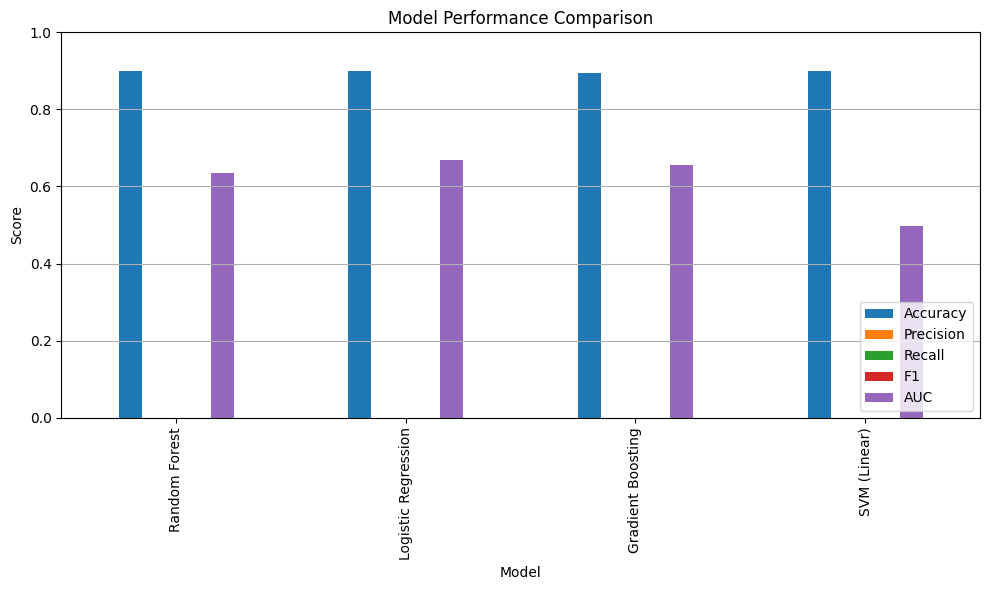

In [4]:
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']

results_df.set_index('Model')[metrics].plot(kind='bar', figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Plot all ROC curves together to visually compare the classification performance (true positive vs false positive rates) of each model.

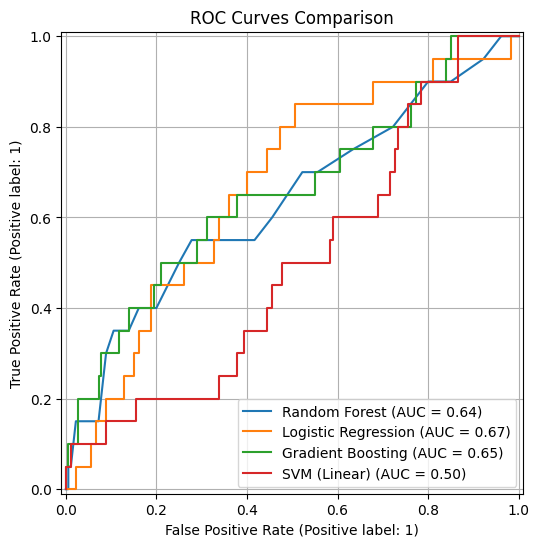

In [5]:
plt.figure(figsize=(8,6))
for name, (y_true, y_probs) in roc_auc_dict.items():
    RocCurveDisplay.from_predictions(y_true, y_probs, name=name, ax=plt.gca())
plt.title('ROC Curves Comparison')
plt.grid()
plt.show()


Upload summary model results and per-sample predictions for each model back to Snowflake for storage or further analysis.

In [6]:
import snowflake.connector
from snowflake.connector.pandas_tools import write_pandas

conn = snowflake.connector.connect(
    user='RahulK',
    password='Blackbird@SR71',
    account='qbnyjjm-fo49998',
    warehouse='COMPUTE_WH',
    database='Network Traffic Anomaly Detection Dataset',
    schema='DATA'
)
conn.cursor().execute('USE DATABASE "Network Traffic Anomaly Detection Dataset";')
conn.cursor().execute("USE SCHEMA DATA;")
conn.cursor().execute("USE WAREHOUSE COMPUTE_WH;")

# Now your write_pandas call
success, nchunks, nrows, _ = write_pandas(conn, results_df, 'IDS_MODEL_RESULTS', auto_create_table=True)
print(f"Uploaded {nrows} model metrics rows: {success}")

# For storing predictions (same context applies)
for name, clf in models.items():
    y_pred = clf.predict(X_test_scaled)
    sample_results = X_test.copy()
    sample_results['ACTUAL_LABEL'] = y_test.values
    sample_results['PREDICTED_LABEL'] = y_pred
    sample_results['MODEL'] = name
    write_pandas(conn, sample_results, 'IDS_MODEL_PREDICTIONS', auto_create_table=True)




Uploaded 4 model metrics rows: True


/tmp/ipython-input-6-1578310302.py:27: UserWarning: Pandas Dataframe has non-standard index of type <class 'pandas.core.indexes.base.Index'> which will not be written. Consider changing the index to pd.RangeIndex(start=0,...,step=1) or call reset_index() to keep index as column(s)
  write_pandas(conn, sample_results, 'IDS_MODEL_PREDICTIONS', auto_create_table=True)
/tmp/ipython-input-6-1578310302.py:27: UserWarning: Pandas Dataframe has non-standard index of type <class 'pandas.core.indexes.base.Index'> which will not be written. Consider changing the index to pd.RangeIndex(start=0,...,step=1) or call reset_index() to keep index as column(s)
  write_pandas(conn, sample_results, 'IDS_MODEL_PREDICTIONS', auto_create_table=True)
/tmp/ipython-input-6-1578310302.py:27: UserWarning: Pandas Dataframe has non-standard index of type <class 'pandas.core.indexes.base.Index'> which will not be written. Consider changing the index to pd.RangeIndex(start=0,...,step=1) or call reset_index() to keep i